# Analysis of geneological structure  

In [ ]:
import json
from vocabulary_functions import get_parents, get_family_dictionary
import matplotlib.pyplot as plt
import numpy as np 


In [4]:
def extract_data(pth):
    with open(pth) as f:
        vocab = json.load(f)
    families = get_family_dictionary(vocab)
    parents = get_parents(vocab)
    return vocab, families, parents

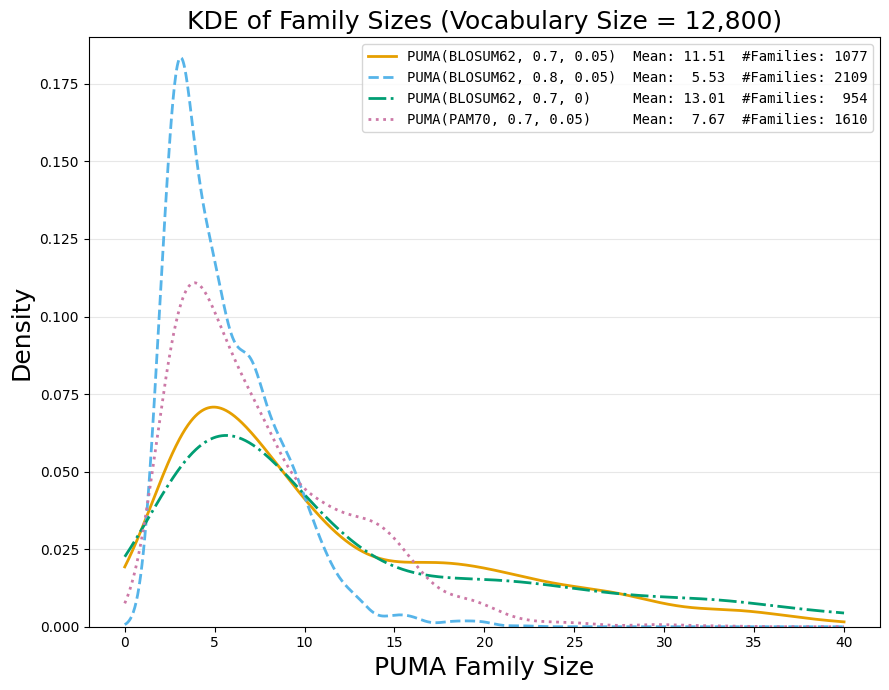

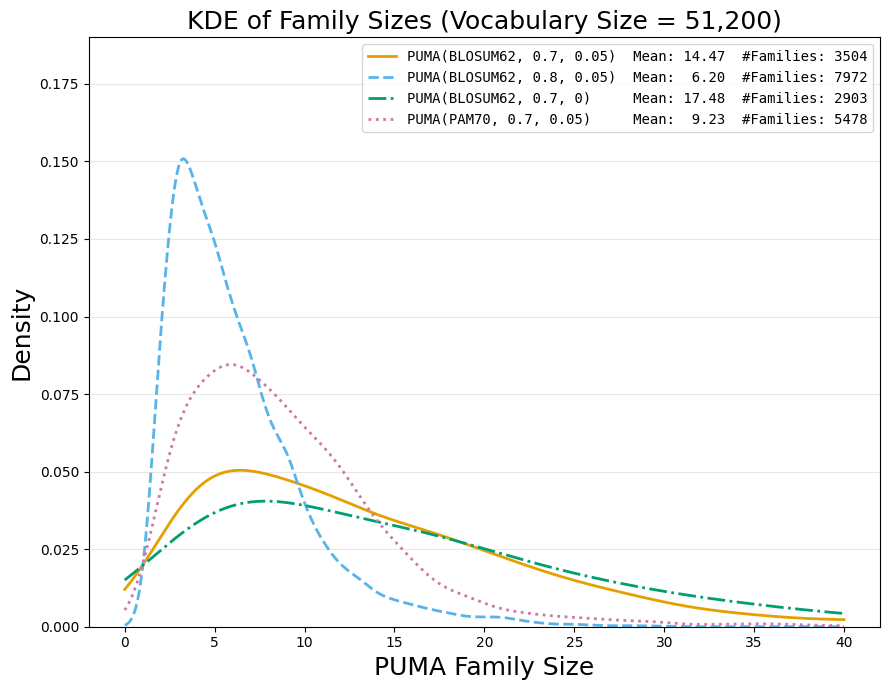

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde


# Requires models trained with multiprocess_train.py
file_paths = [
    "/cta/share/users/mutbpe/tokenizers/blosum62/uniref50_mutbpe_0.7_3_12_0.05_12800.json",
    "/cta/share/users/mutbpe/tokenizers/blosum62/uniref50_mutbpe_0.8_3_12_0.05_12800.json",
    "/cta/share/users/mutbpe/tokenizers/blosum62/uniref50_mutbpe_0.7_3_12_0_12800.json",
    "/cta/share/users/mutbpe/tokenizers/pam70/uniref50_mutbpe_0.7_3_12_0.05_12800.json",
    "/cta/share/users/mutbpe/tokenizers/blosum62/uniref50_mutbpe_0.7_3_12_0.05_51200.json",
    "/cta/share/users/mutbpe/tokenizers/blosum62/uniref50_mutbpe_0.8_3_12_0.05_51200.json",
    "/cta/share/users/mutbpe/tokenizers/blosum62/uniref50_mutbpe_0.7_3_12_0_51200.json",
    "/cta/share/users/mutbpe/tokenizers/pam70/uniref50_mutbpe_0.7_3_12_0.05_51200.json",
]

file_labels = [
    "PUMA(BLOSUM62, 0.7, 0.05)", "PUMA(BLOSUM62, 0.8, 0.05)", "PUMA(BLOSUM62, 0.7, 0)", "PUMA(PAM70, 0.7, 0.05)",  
    "PUMA(BLOSUM62, 0.7, 0.05)", "PUMA(BLOSUM62, 0.8, 0.05)", "PUMA(BLOSUM62, 0.7, 0)", "PUMA(PAM70, 0.7, 0.05)",  
]

# Colorblind-friendly colors (Okabe-Ito palette)
CB_COLORS = ['#E69F00', '#56B4E9', '#009E73','#CC79A7', '#D55E00', '#0072B2',  '#F0E442']

# 2. Process and Plot Function
def plot_kde_group(ax, files_to_plot, labels_to_plot, sub_title, color_offset=0, log_correct=False):
    linestyles = ['-', '--', '-.', ':']
    
    collected_data = []
    max_val_seen = 0

    # Data Gathering
    for f_path in files_to_plot:
        _, families, parents = extract_data(f_path)
        combined_data = [len(families[p]) for p in parents]
        collected_data.append(combined_data)
        if combined_data and max(combined_data) > max_val_seen:
            max_val_seen = max(combined_data)

    # Grid Definition
    x_grid = np.linspace(0.0001, 40, 1000)

    # Plotting Loop
    for i, data in enumerate(collected_data):
        if not data: continue
        
        mean_val = np.mean(data)
        density = gaussian_kde(data)
        y_vals = density(x_grid)

        if log_correct:
            log_data = np.log(data)
            kde_log = gaussian_kde(log_data)
            log_x_grid = np.log(x_grid)
            y_vals = kde_log(log_x_grid) * (1 / x_grid)

        # Select style
        c = CB_COLORS[(i + color_offset) % len(CB_COLORS)]
        ls = linestyles[i % len(linestyles)]
        lbl = labels_to_plot[i]

        # Draw KDE
        ax.plot(x_grid, y_vals, color=c, linestyle=ls, linewidth=2, label=lbl.ljust(27) + f"Mean: " + f"{mean_val:.2f}".rjust(5) + f"  #Families: " + f"{len(data)}".rjust(4))
        
        # # Draw Mean Line
        # ax.axvline(
        #     x=mean_val, color=c, linestyle=':', 
        #     alpha=0.6, linewidth=1.5, 
        #     label=f"Mean: {mean_val:.2f}"
        # )

    # Formatting
    ax.set_title(sub_title, fontsize=18)
    ax.set_xlabel('PUMA Family Size', fontsize=18)
    ax.set_ylabel('Density', fontsize=18)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(fontsize=12, loc='upper right', prop={"family": 'monospace'})
    ax.set_ylim([0, 0.19])

# 3. Create Separate Plots
# Note: figsize=(9, 7) is roughly half of original (18, 7), maintaining aspect ratio per plot
# plt.rcParams['font.family'] = 'monospace'
# Plot 1
fig1, ax1 = plt.subplots(figsize=(9, 7))
plot_kde_group(
    ax=ax1, 
    files_to_plot=file_paths[0:4], 
    labels_to_plot=file_labels[0:4],
    sub_title='KDE of Family Sizes (Vocabulary Size = 12,800)',
    color_offset=0
)
plt.tight_layout()
# plt.savefig("prelim_kde_a.eps")
plt.show() 

# Plot 2
fig2, ax2 = plt.subplots(figsize=(9, 7))
plot_kde_group(
    ax=ax2, 
    files_to_plot=file_paths[4:], 
    labels_to_plot=file_labels[4:],
    sub_title='KDE of Family Sizes (Vocabulary Size = 51,200)',
    color_offset=0 # Resetting offset to 0 so both plots use the same consistent color scheme
)
plt.tight_layout()
# plt.savefig("prelim_kde_b.eps")
plt.show() 